# Load data
This is a dataset of first-hand commercial housing transaction information in Shenzhen, recording the city area, price, house area and number of salespersons of first-hand commercial housing sold in Shenzhen.

In [1]:
import pandas as pd

# Load data file
file_path = 'data_new.csv'
data = pd.read_csv(file_path)

# display the data
data.head()

,district,Price,size,sold,target
0,全市,65280.38,777.36,4,144平方米以上
1,宝安,65280.38,777.36,4,144平方米以上
2,福田,85019.86,122.46,1,90~144平方米
3,宝安,58682.50,1218.24,11,90~144平方米
4,光明,40805.81,862.07,8,90~144平方米


# Data operation
1. calculate the mean, standard variance, minimum and maximum of each class.
2. calculate the frequency of the appearance of different classes in targets.

In [2]:
from pandas.api.types import is_numeric_dtype

for col in data.columns:
    if is_numeric_dtype(data[col]):
        print('%s:' % (col))
        print('\t Mean = %.2f' % data[col].mean())
        print('\t Standard deviation = %.2f' % data[col].std())
        print('\t Minimum = %.2f' % data[col].min())
        print('\t Maximum = %.2f' % data[col].max())

Price:
	 Mean = 55957.12
	 Standard deviation = 24490.95
	 Minimum = 6323.48
	 Maximum = 277462.32
size:
	 Mean = 1163.60
	 Standard deviation = 3137.01
	 Minimum = 24.51
	 Maximum = 85590.17
 sold:
	 Mean = 10.80
	 Standard deviation = 29.25
	 Minimum = 1.00
	 Maximum = 856.00


In [3]:
data['district'].value_counts()

district
全市    1409
宝安    1269
龙岗    1064
龙华    1054
南山     963
光明     900
坪山     819
福田     790
罗湖     718
深汕     512
盐田     311
大鹏     191
Name: count, dtype: int64

In [4]:
data['target'].value_counts()

target
90~144平方米    4318
90平方米以下      3995
144平方米以上     1687
Name: count, dtype: int64

In [5]:
data['Price'].value_counts()

Price
10000.00    10
6500.00      5
15000.00     4
50000.00     4
26800.00     3
            ..
90346.05     1
50466.39     1
44617.81     1
56835.71     1
39676.61     1
Name: count, Length: 9824, dtype: int64

# 2. Data transition
We can see that for regions and target results, their data types are all strings, which is not convenient for learning. So first we need to replace the strings in the data with numbers, and then get the results according to the corresponding table when we need to get the results.First, let's convert the regions into their corresponding numbers. Since there are many types of regions, we first print out all the region types and their corresponding numbers

In [6]:
# data of region
district = data.iloc[:, 0]
# initialize a dictionary to store different string and their corresponding number.
unique_dict = {}
current_number = 1

for value in district:
    if value not in unique_dict:
        unique_dict[value] = current_number
        print(f'{value}: {current_number}')
        current_number += 1

全市: 1
宝安: 2
福田: 3
光明: 4
龙岗: 5
龙华: 6
南山: 7
坪山: 8
深汕: 9
盐田: 10
罗湖: 11
大鹏: 12


### Replace the string (City)

In [7]:
# transfer the city into their corresponding class number
data['district'] = data['district'].map(unique_dict)

data.head()

,district,Price,size,sold,target
0,1,65280.38,777.36,4,144平方米以上
1,2,65280.38,777.36,4,144平方米以上
2,3,85019.86,122.46,1,90~144平方米
3,2,58682.50,1218.24,11,90~144平方米
4,4,40805.81,862.07,8,90~144平方米


### Get the target (Square)

In [8]:
# print the data in the last column
target = data.iloc[:, -1]

# Initial a dictionart to store the different string and their corresponding number of the last column.
unique_target = {}
current_number = 1

# data in the last column
for value in target:
    if value not in unique_target:
        unique_target[value] = current_number
        print(f'{value}: {current_number}')
        current_number += 1


144平方米以上: 1
90~144平方米: 2
90平方米以下: 3


### replace square into number. 

In [9]:
# use dictionary to replace the string in the last column into number
data['target'] = data['target'].map(unique_target)

# show the five line fronted the data
data.head()

,district,Price,size,sold,target
0,1,65280.38,777.36,4,1
1,2,65280.38,777.36,4,1
2,3,85019.86,122.46,1,2
3,2,58682.50,1218.24,11,2
4,4,40805.81,862.07,8,2


# Data and fearture property
1. Use the describe() function to display a summary of all attributes in a table at the same time. Display the average and standard deviation of Price, size, and sold. Display the number of unique values and the highest value (the most common value) of district and target.
2. Compute covariance and correlation between pairs of attributes
3. Compute the histogram of each feature.
4. use pairplots to show the relation of different columns.
5. use boxplot to show the distribution of features.
6. use scatter to show the distribution of each pair of feature.

In [10]:
data.describe(include='all')

,district,Price,size,sold,target
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5.276200,55957.119823,1163.600729,10.801300,2.230800
std,3.173692,24490.948336,3137.006472,29.249618,0.717623
min,1.000000,6323.480000,24.510000,1.000000,1.000000
25%,2.000000,40057.157500,174.552500,2.000000,2.000000
50%,5.000000,51950.575000,424.220000,4.000000,2.000000
75%,8.000000,70220.762500,1023.087500,10.000000,3.000000
max,12.000000,277462.320000,85590.170000,856.000000,3.000000


In [11]:
# Covariance
print('Covariance:')
data.cov()

Covariance:


,district,Price,size,sold,target
district,10.072321,-1.959143e+04,-2.637562e+03,-24.099729,0.223575
Price,-19591.430548,5.998066e+08,-4.423948e+06,-39829.210627,-5563.292601
size,-2637.562475,-4.423948e+06,9.840810e+06,58263.892977,-209.596133
sold,-24.099729,-3.982921e+04,5.826389e+04,855.540172,2.036764
target,0.223575,-5.563293e+03,-2.095961e+02,2.036764,0.514983


In [12]:
# Correlation
print('Correlation:')
data.corr()

Correlation:


,district,Price,size,sold,target
district,1.000000,-0.252055,-0.264925,-0.259613,0.098166
Price,-0.252055,1.000000,-0.057582,-0.055600,-0.316541
size,-0.264925,-0.057582,1.000000,0.634986,-0.093105
sold,-0.259613,-0.055600,0.634986,1.000000,0.097034
target,0.098166,-0.316541,-0.093105,0.097034,1.000000


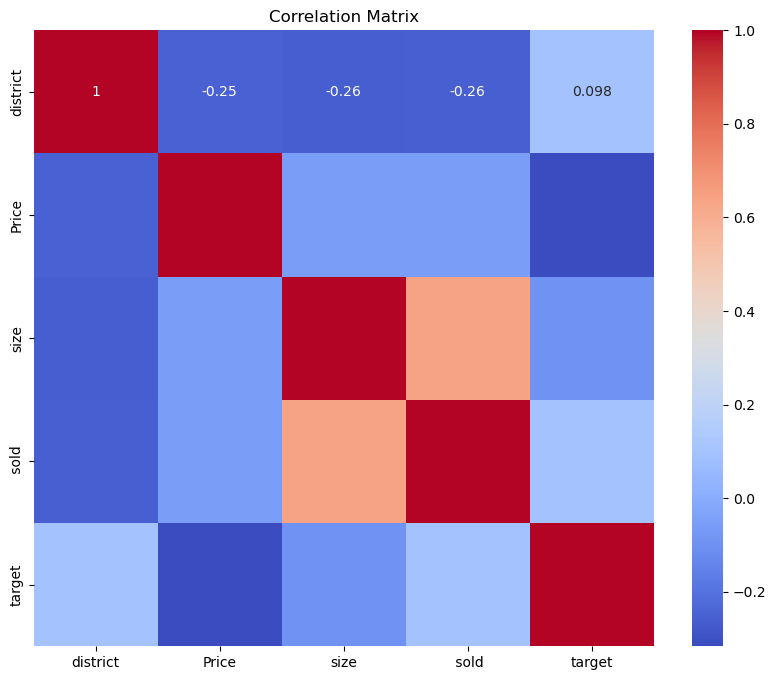

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
#create a correlation matrix
correlation_matrix=data.corr()
#set the figure to display the correlation matrix
plt.figure(figsize=(10,8))
#annot=True: 控制是否在热图上显示数值标签。如果设置为 True，则会在每个单元格中显示数值。
#cmap='coolwarm': 控制颜色映射，即用于表示数值的颜色方案。在这里，'coolwarm' 颜色映射表示低值为蓝色，高值为红色，中间值为白色，因此可以用于可视化正负相关性。
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm')
#set the title of the figure
plt.title('Correlation Matrix')
plt.show()

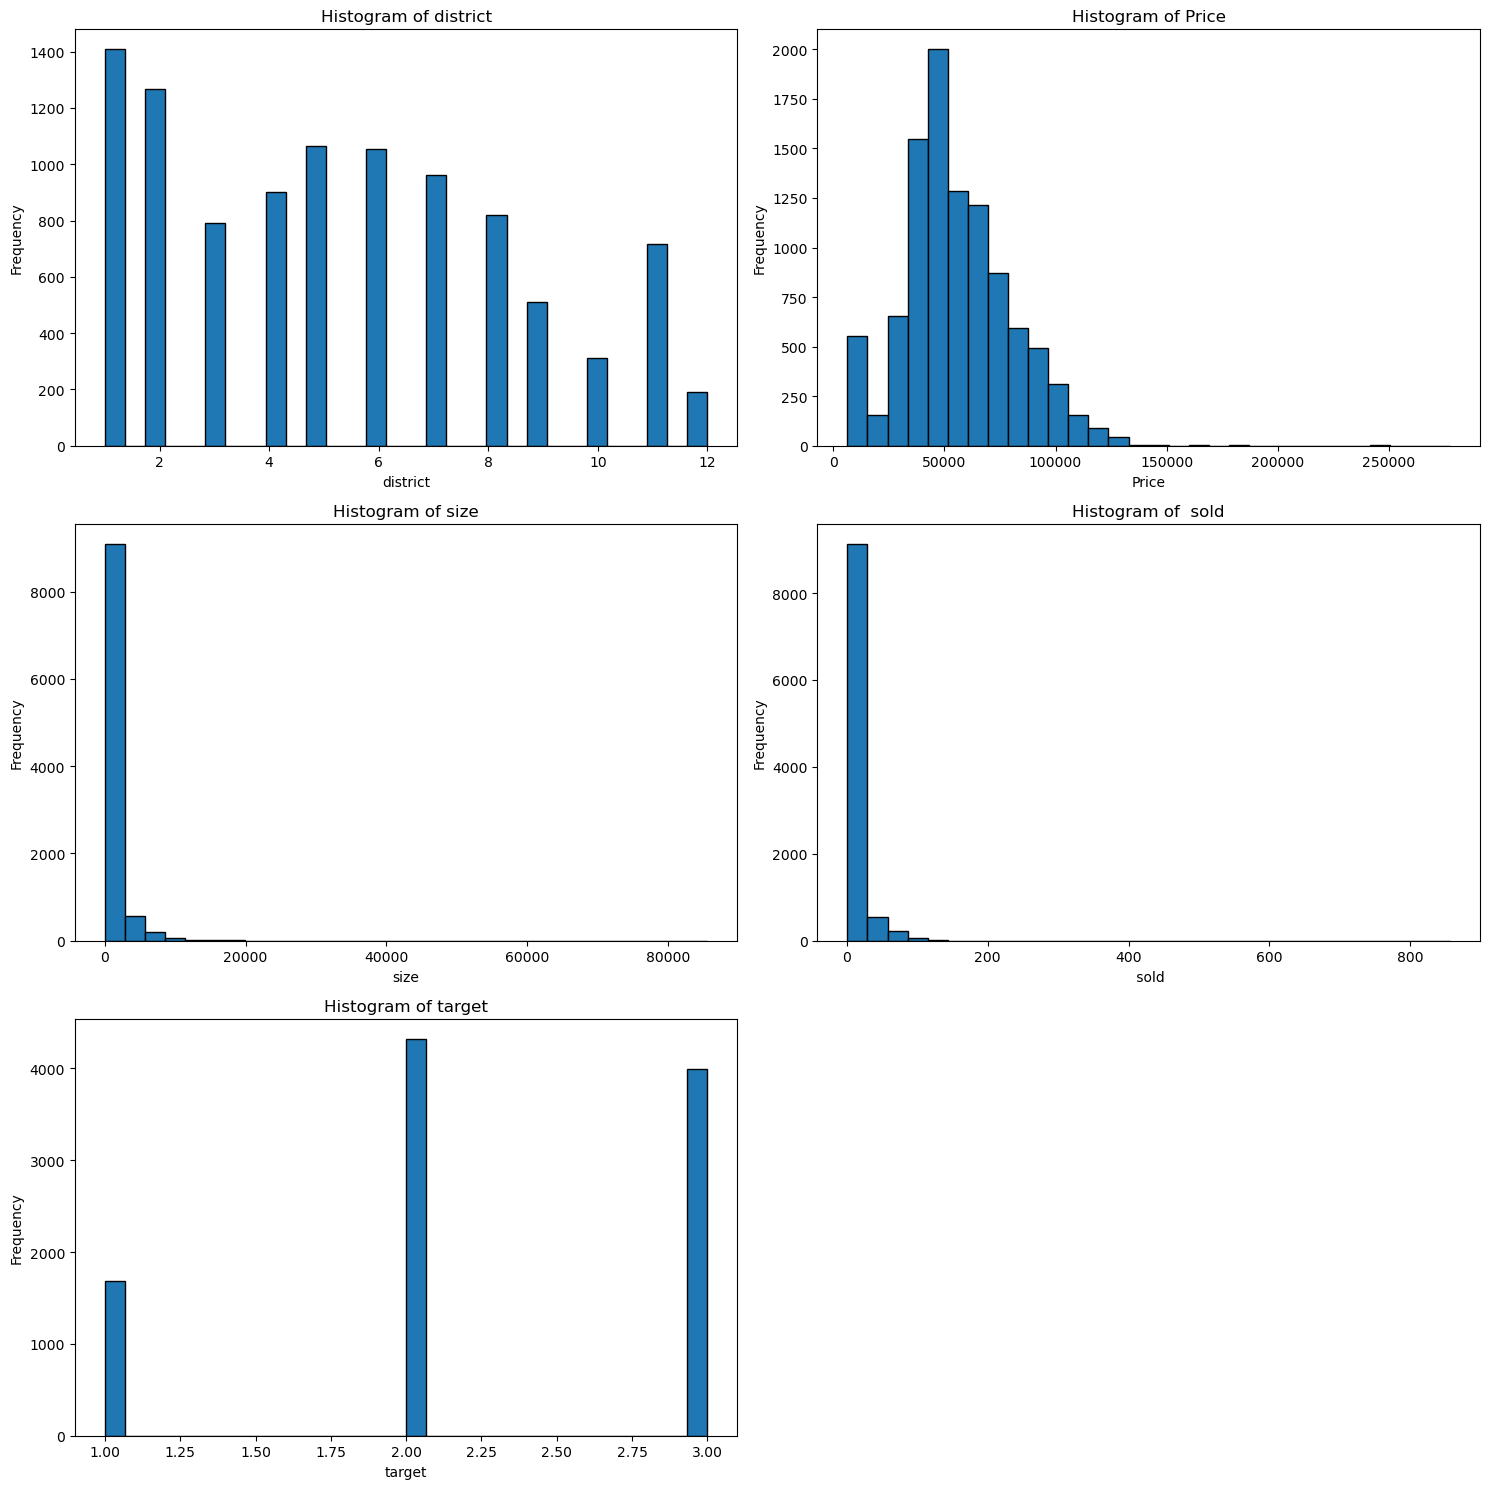

In [14]:
import matplotlib.pyplot as plt
# layout of subplots
num_columns = len(data.columns)
num_rows = (num_columns + 1) // 2  # 两行布局

fig, axes = plt.subplots(num_rows, 2, figsize=(15, num_rows * 5))

# draw the histogram
for i, column in enumerate(data.columns):
    row = i // 2
    col = i % 2
    ax = axes[row, col]
    ax.hist(data[column], bins=30, edgecolor='black')
    ax.set_title(f'Histogram of {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Frequency')

# if the number of subplots is odd, deleter the redund subplots
if num_columns % 2 != 0:
    fig.delaxes(axes[-1, -1])

plt.tight_layout()
plt.show()

/Users/heyuxuan/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/heyuxuan/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/heyuxuan/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/heyuxuan/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future ver

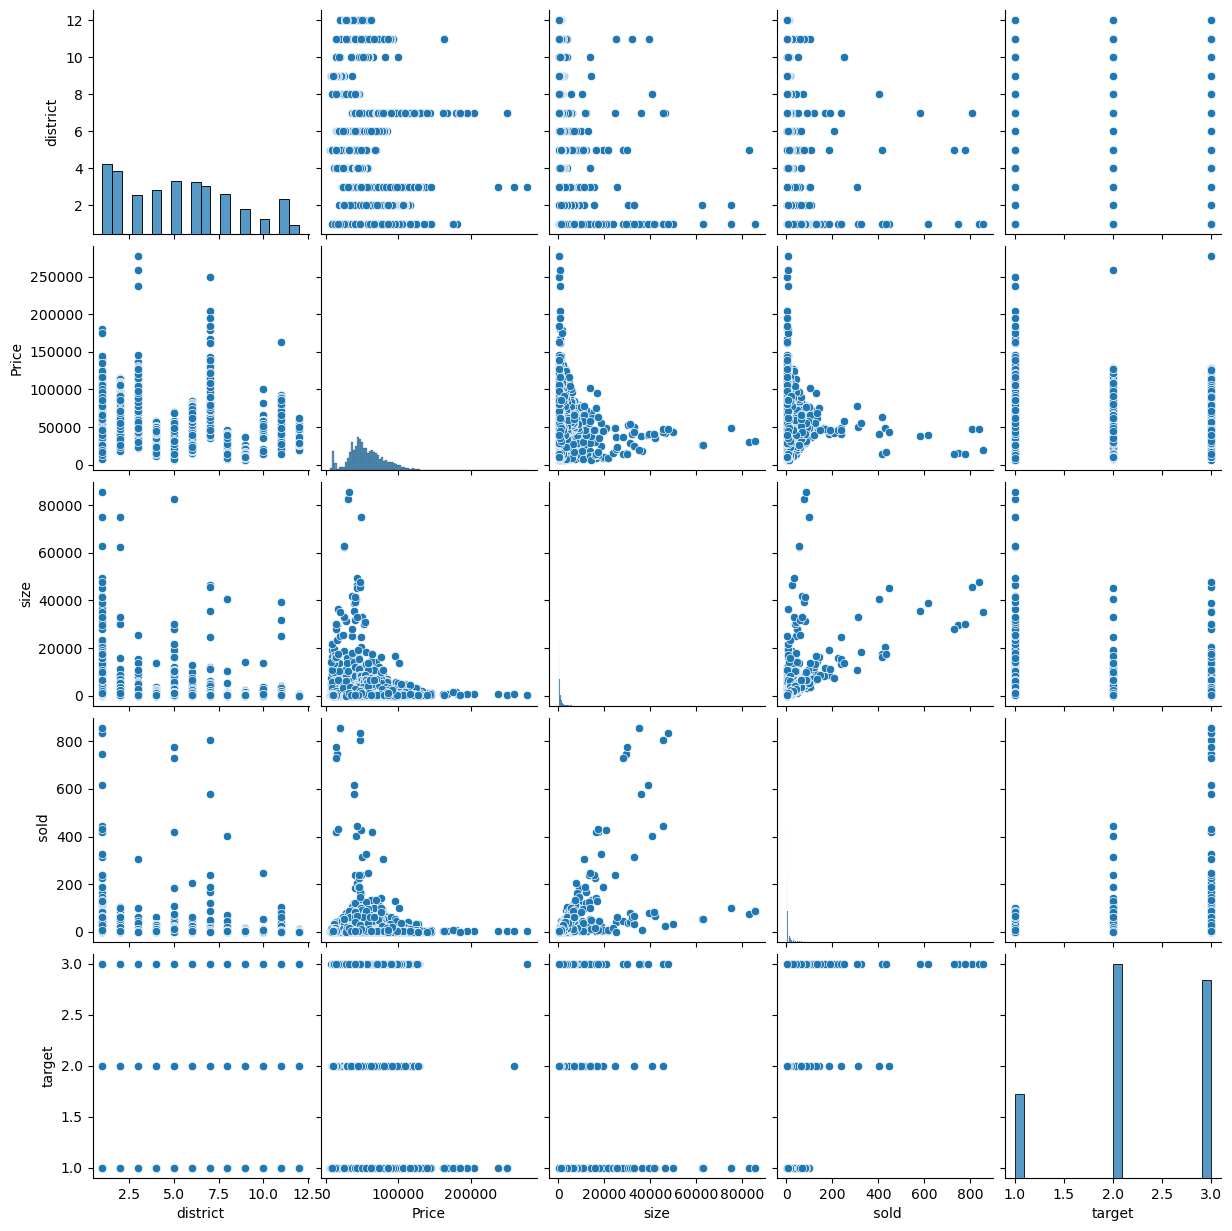

In [15]:
#pairplot using sns
sns.pairplot(data,diag_kind='hist')

<Axes: >

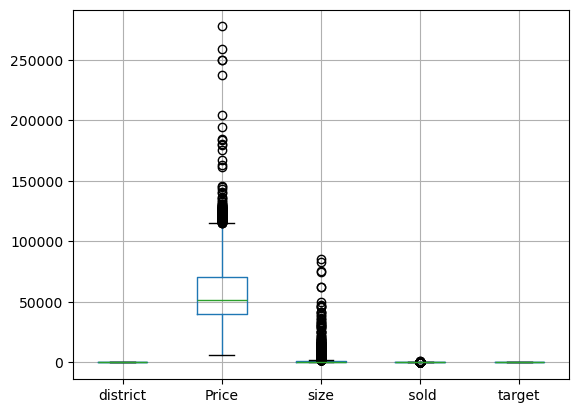

In [16]:
data.boxplot()

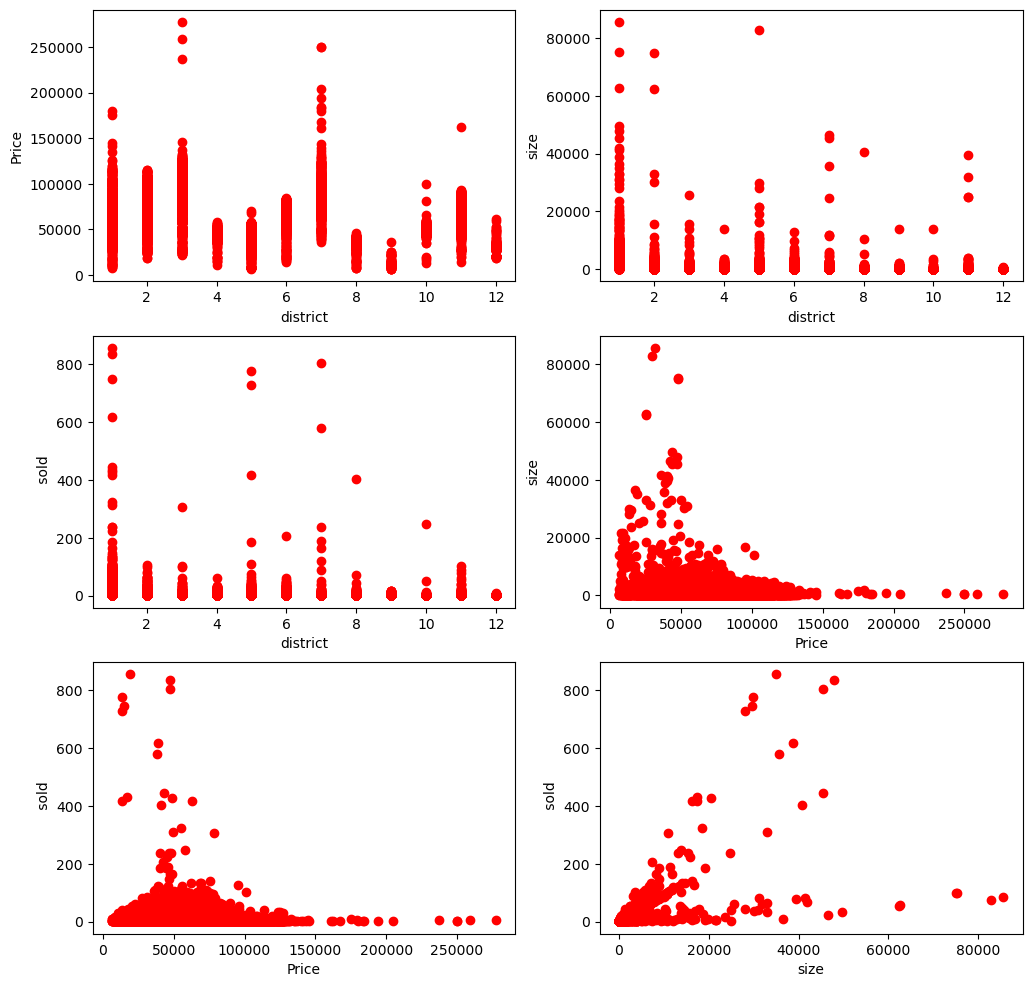

In [17]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(3, 2, figsize=(12,12))
index = 0
for i in range(3):
    for j in range(i+1,4):
        ax1 = int(index/2)
        ax2 = index % 2
        axes[ax1][ax2].scatter(data[data.columns[i]], data[data.columns[j]], color='red')
        axes[ax1][ax2].set_xlabel(data.columns[i])
        axes[ax1][ax2].set_ylabel(data.columns[j])
        index = index + 1

# Data preprocessing
1. Find lost data
2. Find duplicate data and correct it

In [18]:
import numpy as np

data = data.replace('?',np.NaN)

print('Number of instances = %d' % (data.shape[0]))
print('Number of attributes = %d' % (data.shape[1]))

print('Number of missing values:')
for col in data.columns:
    print('\t%s: %d' % (col,data[col].isna().sum()))

Number of instances = 10000
Number of attributes = 5
Number of missing values:
	district: 0
	Price: 0
	size: 0
	 sold: 0
	target: 0


You can see that this data set is relatively full, and there is no data of eye contact.

### Check if there are duplicate samples

In [19]:
dups = data.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

Number of duplicate rows = 48


Here we can see that there are 48 repeated samples, and then we set these repeated samples to one sample. Here we can see the number of samples before and after correction.

In [20]:
print('Number of rows before discarding duplicates = %d' % (data.shape[0]))
data2 = data.drop_duplicates()
print('Number of rows after discarding duplicates = %d' % (data2.shape[0]))

Number of rows before discarding duplicates = 10000
Number of rows after discarding duplicates = 9952


# Programming Method
1. linear regrassion
2. ridge regression
3. lasso regression
4. logistic regression
5. linear discrimination analysis
6. GaussianNB
7. MultinomialNB
8. BinomialNB
9. SVM
10. decision tree

## Linear regrassion model.

/Users/heyuxuan/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


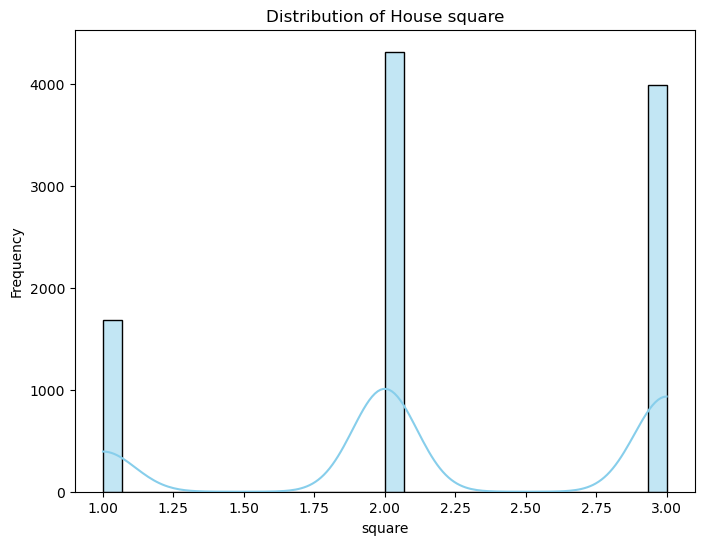

In [21]:
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error,r2_score

x=data.drop('target',axis=1)
y=data['target']
#split data into training and testing sets
#split data with 90% for training and 10% for testing
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.10,random_state=42)
#print(x)
#print(y)

#plot the distribution of the target varibale
plt.figure(figsize=(8,6))
#kde:绘制概率密度函数
sns.histplot(data['target'],bins=30,kde=True,color='skyblue')
#set the title and the labels of x axis and y axis
plt.title('Distribution of House square')
plt.xlabel('square')
plt.ylabel('Frequency')
plt.show()

In [22]:
#linear regrassion model

#create Linear Regression model object
lr_model=LinearRegression()
#train the model using training data
lr_model.fit(x_train,y_train)

print('linear model:',lr_model)

#apply model to the train set
y_pred_train=lr_model.predict(x_train)
#apply model to the test set
y_pred_test=lr_model.predict(x_test)

#print(y_pred_test)

linear model: LinearRegression()


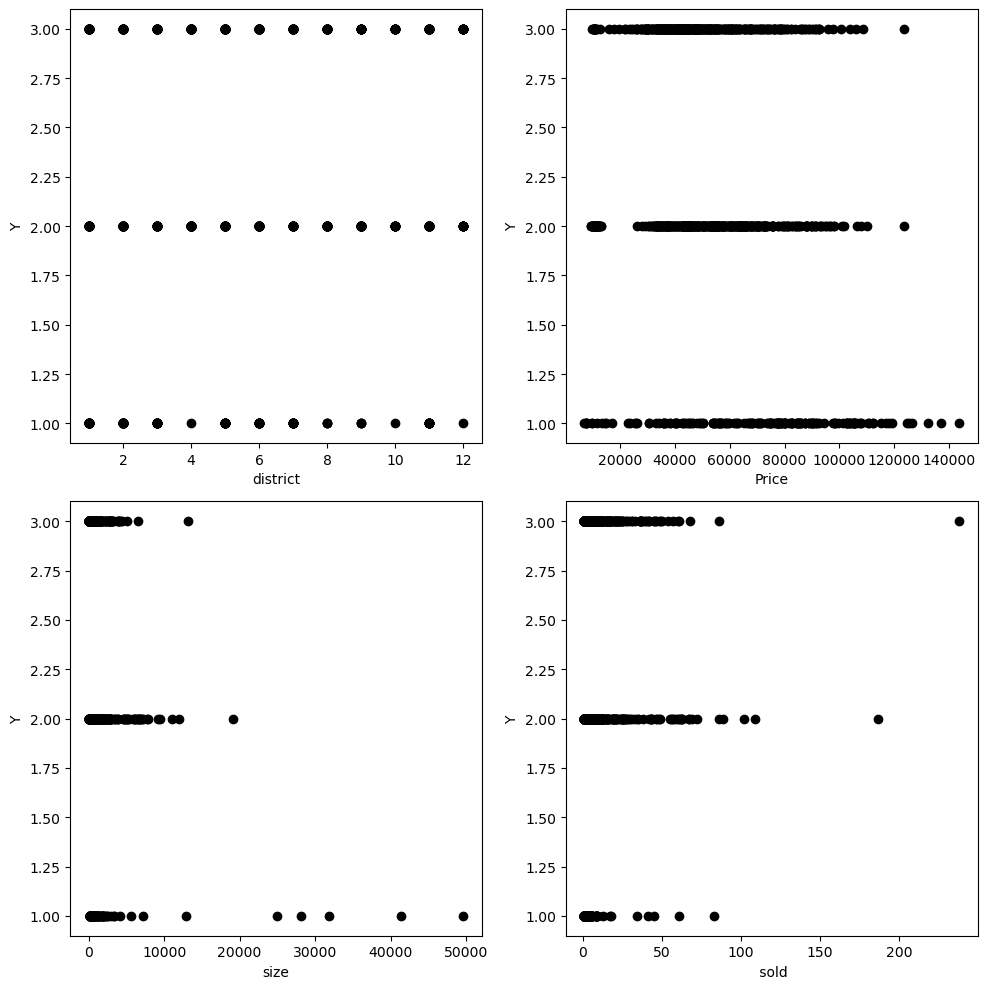

In [23]:
import matplotlib.pyplot as plt

# Ensure x_test is a NumPy array
x_test_array = x_test.values if isinstance(x_test, pd.DataFrame) else x_test

# Create a 4x4 subplot
fig, axs = plt.subplots(2, 2, figsize=(10, 10)) 

for i in range(4):
    row = i // 2
    col = i % 2
    # Draw the scatter plot
    axs[row, col].scatter(x_test_array[:, i], y_test, color='black')
    # Set the x axis label
    axs[row, col].set_xlabel(data.columns[i])
    # Set the y axis label
    axs[row, col].set_ylabel('Y')

# Adjust the layout of figures
plt.tight_layout()
plt.show()

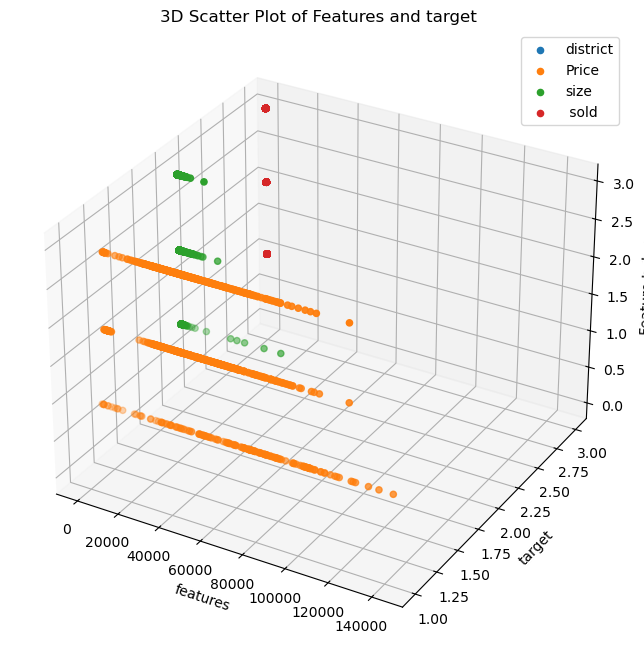

In [24]:
#using 3D scatter to display the relation of the 13 features and the target
from mpl_toolkits.mplot3d import Axes3D

#create the figure and the subplot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

for i in range(4):
    #draw the scatter
    ax.scatter(x_test_array[:, i], y_test, zs=i, zdir='y', label=data.columns[i])

#set the label of x and y and z axis
ax.set_xlabel('features')
ax.set_ylabel('target')
ax.set_zlabel('Feature Index')
#set the title of the plot
ax.set_title('3D Scatter Plot of Features and target')

plt.legend()
plt.show()

Root mean squared error = 0.6766
----------------------------------------------------------------------
R-squared = 0.1353
----------------------------------------------------------------------
linear cross validation score:
 [-0.46552285 -0.42806556 -0.42560847 -0.44070223 -0.46346923 -0.4362739
 -0.45212601 -0.43293828 -0.42902652 -0.4022223 ]
----------------------------------------------------------------------
linear average mean squared error:
 0.43759553544079266
----------------------------------------------------------------------
mean squared error on training set of linear regression:
 0.45772085466237045
----------------------------------------------------------------------
Intercept= 2.7473295390641734
cofficients= [ 2.31008889e-03 -9.28311439e-06 -6.13061038e-05  6.03700640e-03]
----------------------------------------------------------------------


['0.00 X1 + -0.00 X2 + -0.00 X3 + 0.01 X4 + 2.75',
 0.6597048054176102,
 0.6765507036892139,
 2.755747223570236]

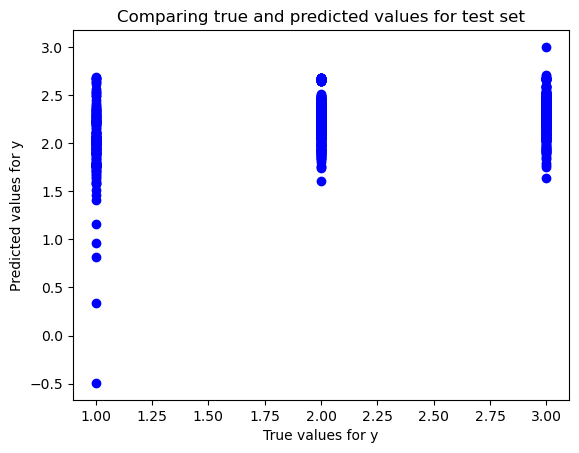

In [25]:
# Comparing true versus predicted values
plt.scatter(y_test, y_pred_test, color='blue')
plt.title('Comparing true and predicted values for test set')
plt.xlabel('True values for y')
plt.ylabel('Predicted values for y')

# Model evaluation
print("Root mean squared error = %.4f" % np.sqrt(mean_squared_error(y_test, y_pred_test)))
print('----------------------------------------------------------------------')
print('R-squared = %.4f' % r2_score(y_test, y_pred_test))
print('----------------------------------------------------------------------')

#perform 10-fold cross validation for linear regression

#perform cross-validation
lr_cv_score=cross_val_score(lr_model,x_train,y_train,cv=10,scoring='neg_mean_squared_error')
print('linear cross validation score:\n',lr_cv_score)
print('----------------------------------------------------------------------')

#calculate average mean squared error
lr_avg_mse=-np.mean(lr_cv_score)
print('linear average mean squared error:\n',lr_avg_mse)
print('----------------------------------------------------------------------')

#calculate mean squared error on testing set
lr_mse_test=mean_squared_error(y_test,lr_model.predict(x_test))
print('mean squared error on training set of linear regression:\n',lr_mse_test)
print('----------------------------------------------------------------------')

#postprocessing
#display model parameters
print('Intercept=',lr_model.intercept_)
print('cofficients=',lr_model.coef_)
print('----------------------------------------------------------------------')

#show the result model
model='%.2f X1 + %.2f X2 + %.2f X3 + %.2f X4 + %.2f'% (lr_model.coef_[0], 
                                        lr_model.coef_[1], lr_model.coef_[2], 
                                        lr_model.coef_[3], lr_model.intercept_)
values = [ model, np.sqrt(mean_squared_error(y_train, y_pred_train)), 
           np.sqrt(mean_squared_error(y_test, y_pred_test)),
           np.absolute(lr_model.coef_).sum() + np.absolute(lr_model.intercept_)]

values

## Ridge regressiom model

In [26]:
#Ridge Regression Model with hyper-parameter tuning

#define a range of alpha values for Ridge regression
alphas=np.linspace(0.01,1,100)
print('alphas:',alphas)

#list to store average mean squared errors
ridge_avg_mses=[]

alphas: [0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.1  0.11 0.12 0.13 0.14
 0.15 0.16 0.17 0.18 0.19 0.2  0.21 0.22 0.23 0.24 0.25 0.26 0.27 0.28
 0.29 0.3  0.31 0.32 0.33 0.34 0.35 0.36 0.37 0.38 0.39 0.4  0.41 0.42
 0.43 0.44 0.45 0.46 0.47 0.48 0.49 0.5  0.51 0.52 0.53 0.54 0.55 0.56
 0.57 0.58 0.59 0.6  0.61 0.62 0.63 0.64 0.65 0.66 0.67 0.68 0.69 0.7
 0.71 0.72 0.73 0.74 0.75 0.76 0.77 0.78 0.79 0.8  0.81 0.82 0.83 0.84
 0.85 0.86 0.87 0.88 0.89 0.9  0.91 0.92 0.93 0.94 0.95 0.96 0.97 0.98
 0.99 1.  ]


average mean squared error on training set via 10-fold cross validation: 0.4375955325454841
----------------------------------------------------------------------
beat alpha: 1.0
----------------------------------------------------------------------
ridge linear model: Ridge()
----------------------------------------------------------------------
mean squared error on training set of ridge regression: 0.4577208607323042
----------------------------------------------------------------------
Root mean squared error = 0.6766
----------------------------------------------------------------------
R-squared = 0.1353


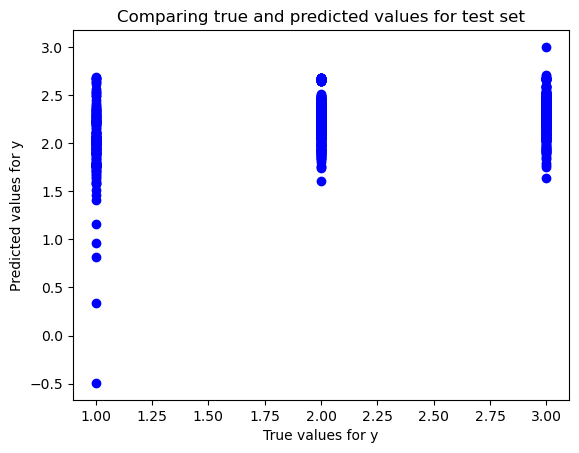

In [27]:
#loop through each alpha value
for alpha in alphas:
    #create ridge regression model object with current alpha
    ridge_model=Ridge(alpha=alpha)
    #perform cross-validation
    ridge_cv_score = cross_val_score(ridge_model, x_train, y_train, cv=10, scoring='neg_mean_squared_error')
    
    #calculate average mean squared error
    ridge_avg_mse=-np.mean(ridge_cv_score)
    #append the average mean squared error to the list
    ridge_avg_mses.append(ridge_avg_mse)
    
#find the alpha value with the lowest average mean squared error
best_alpha=alphas[np.argmin(ridge_avg_mses)]
print('average mean squared error on training set via 10-fold cross validation:',np.min(ridge_avg_mses))
print('----------------------------------------------------------------------')
print('beat alpha:',best_alpha)
print('----------------------------------------------------------------------')

#train ridge regression model with best alpha
#create ridge regression model object with best alpha
ridge_model=Ridge(alpha=best_alpha)
#train the model using training data
ridge_model.fit(x_train,y_train)
print('ridge linear model:',ridge_model)
print('----------------------------------------------------------------------')
#apply model to the train set
ridge_pred_train=ridge_model.predict(x_train)
#apply model to the test set
ridge_pred_test=ridge_model.predict(x_test)

#calculate mean squared error for ridge regression on testing set
ridge_mse_test=mean_squared_error(y_test,ridge_model.predict(x_test))
print('mean squared error on training set of ridge regression:',ridge_mse_test)
print('----------------------------------------------------------------------')

# Comparing true versus predicted values
plt.scatter(y_test, ridge_pred_test, color='blue')
plt.title('Comparing true and predicted values for test set')
plt.xlabel('True values for y')
plt.ylabel('Predicted values for y')

# Model evaluation
print("Root mean squared error = %.4f" % np.sqrt(mean_squared_error(y_test, ridge_pred_test)))
print('----------------------------------------------------------------------')
print('R-squared = %.4f' % r2_score(y_test, ridge_pred_test))

In [28]:
#perform 10-fold cross validation for ridge linear regression

#perform cross-validation
ridge_cv_score=cross_val_score(ridge_model,x_train,y_train,cv=10,scoring='neg_mean_squared_error')
print('ridge linear cross validation score:\n',ridge_cv_score)
print('----------------------------------------------------------------------')

#calculate average mean squared error
ridge_avg_mse=-np.mean(ridge_cv_score)
print('ridge linear average mean squared error:',ridge_avg_mse)
print('----------------------------------------------------------------------')

#calculate mean squared error on testing set
ridge_mse_test=mean_squared_error(y_test,ridge_model.predict(x_test))
print('mean squared error on training set of ridge linear regression:',ridge_mse_test)

ridge linear cross validation score:
 [-0.46552284 -0.42806557 -0.42560848 -0.44070222 -0.46346922 -0.4362739
 -0.45212601 -0.43293827 -0.42902652 -0.4022223 ]
----------------------------------------------------------------------
ridge linear average mean squared error: 0.4375955325454841
----------------------------------------------------------------------
mean squared error on training set of ridge linear regression: 0.4577208607323042


In [29]:
#postprocessing
#display model parameters
print('Intercept=',ridge_model.intercept_)
print('----------------------------------------------------------------------')
print('cofficients=\n',ridge_model.coef_)
print('----------------------------------------------------------------------')

#show the result model
model='%.2f X1 + %.2f X2 + %.2f X3 + %.2f X4 + %.2f'% (ridge_model.coef_[0], 
                                        ridge_model.coef_[1], ridge_model.coef_[2], 
                                        ridge_model.coef_[3], ridge_model.intercept_)
values = [ model, np.sqrt(mean_squared_error(y_train, ridge_pred_train)), 
           np.sqrt(mean_squared_error(y_test, ridge_pred_test)),
           np.absolute(ridge_model.coef_).sum() + np.absolute(ridge_model.intercept_)]

values

Intercept= 2.7473297839786204
----------------------------------------------------------------------
cofficients=
 [ 2.31005740e-03 -9.28311551e-06 -6.13061022e-05  6.03700467e-03]
----------------------------------------------------------------------


['0.00 X1 + -0.00 X2 + -0.00 X3 + 0.01 X4 + 2.75',
 0.6597048054176172,
 0.6765507081751554,
 2.755747435266344]

## Lasso regressiom model

mean squared error on training set of Lasso regression: 0.45811589720639495
----------------------------------------------------------------------
Root mean squared error = 0.6768
----------------------------------------------------------------------
R-squared = 0.1345
----------------------------------------------------------------------
Lasso linear cross validation score:
 [-0.4650437  -0.4283843  -0.42581482 -0.44030728 -0.46317412 -0.43631462
 -0.452112   -0.43268813 -0.42931792 -0.40235323]
----------------------------------------------------------------------
Lasso linear average mean squared error: 0.43755101245672706
----------------------------------------------------------------------
mean squared error on training set of ridge linear regression: 0.45811589720639495
----------------------------------------------------------------------
Intercept= 2.765016939963947
----------------------------------------------------------------------
cofficients=
 [ 0.00000000e+00 -9.3634419

['0.00 X1 + -0.00 X2 + -0.00 X3 + 0.01 X4  + 2.77',
 0.6597396844152624,
 0.676842594113576,
 2.771051634614001]

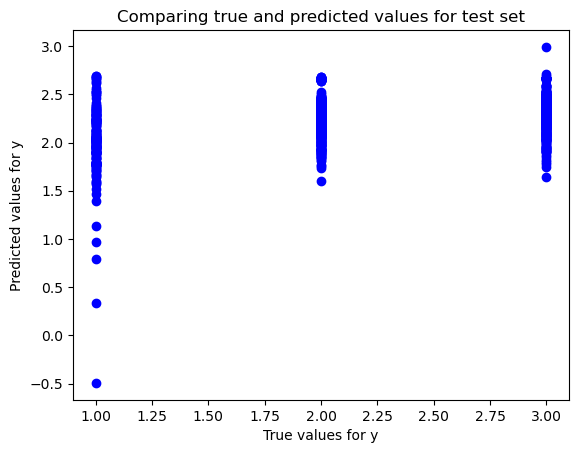

In [30]:
#additional work:Lasso regression
from sklearn import linear_model
#genereate the Lasso model with a parameter of alpha
lasso = linear_model.Lasso(alpha=0.02)
lasso.fit(x_train, y_train)
#apply the model to train set 
y_pred_train_lasso = lasso.predict(x_train)
#apply the model to test set
y_pred_test_lasso = lasso.predict(x_test)

#calculate mean squared error for ridge regression on testing set
lasso_mse_test=mean_squared_error(y_test,lasso.predict(x_test))
print('mean squared error on training set of Lasso regression:',lasso_mse_test)
print('----------------------------------------------------------------------')

# Comparing true versus predicted values
plt.scatter(y_test, y_pred_test_lasso, color='blue')
plt.title('Comparing true and predicted values for test set')
plt.xlabel('True values for y')
plt.ylabel('Predicted values for y')

# Model evaluation
print("Root mean squared error = %.4f" % np.sqrt(mean_squared_error(y_test, y_pred_test_lasso)))
print('----------------------------------------------------------------------')
print('R-squared = %.4f' % r2_score(y_test, y_pred_test_lasso))
print('----------------------------------------------------------------------')

#perform 10-fold cross validation for Lasso linear regression
#perform cross-validation
lasso_cv_score=cross_val_score(lasso,x_train,y_train,cv=10,scoring='neg_mean_squared_error')
print('Lasso linear cross validation score:\n',lasso_cv_score)
print('----------------------------------------------------------------------')

#calculate average mean squared error
lasso_avg_mse=-np.mean(lasso_cv_score)
print('Lasso linear average mean squared error:',lasso_avg_mse)
print('----------------------------------------------------------------------')

#calculate mean squared error on testing set
lasso_mse_test=mean_squared_error(y_test,lasso.predict(x_test))
print('mean squared error on training set of ridge linear regression:',lasso_mse_test)
print('----------------------------------------------------------------------')

#display model parameters
print('Intercept=',lasso.intercept_)
print('----------------------------------------------------------------------')
print('cofficients=\n',lasso.coef_)
print('----------------------------------------------------------------------')

#show the result model
model = "%.2f X1 + %.2f X2 + %.2f X3 + %.2f X4  + %.2f" % (lasso.coef_[0], 
                                        lasso.coef_[1], lasso.coef_[2],
                                        lasso.coef_[3], lasso.intercept_)
values = [ model, np.sqrt(mean_squared_error(y_train, y_pred_train_lasso)), 
           np.sqrt(mean_squared_error(y_test, y_pred_test_lasso)),
           np.absolute(lasso.coef_).sum() + np.absolute(lasso.intercept_)]
values

## Logistic regression model

In [31]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

# Prepare the features and target variable
X = data.drop('target', axis=1)
y = data['target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True,random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and train the logistic regression model
log_reg = LogisticRegression()
log_reg.fit(X_train_scaled, y_train)

# Make predictions
pred_train=log_reg.predict(X_train_scaled)
y_pred = log_reg.predict(X_test_scaled)

#Training Data Probability Prediction
pred_prob_train=log_reg.predict_proba(X_train_scaled)

#Test Data Probability Prediction 
pred_prob_test=log_reg.predict_proba(X_test_scaled)

#Accuracy-Training Data
accuracy1=log_reg.score(X_train_scaled,y_train)
print('Accuracy - Training Data:',accuracy1)

#Accuracy-Test Data
accuracy2=log_reg.score(X_test_scaled,y_test)
print('Accuracy - Test Data:',accuracy2)

Accuracy - Training Data: 0.843375
Accuracy - Test Data: 0.837


Classification Report of the training data:

               precision    recall  f1-score   support

           1       0.84      0.68      0.75      1318
           2       0.81      0.84      0.83      3477
           3       0.88      0.91      0.89      3205

    accuracy                           0.84      8000
   macro avg       0.84      0.81      0.82      8000
weighted avg       0.84      0.84      0.84      8000
 

Classification Report of the test data:

               precision    recall  f1-score   support

           1       0.88      0.66      0.75       369
           2       0.79      0.86      0.82       841
           3       0.88      0.90      0.89       790

    accuracy                           0.84      2000
   macro avg       0.85      0.80      0.82      2000
weighted avg       0.84      0.84      0.84      2000
 



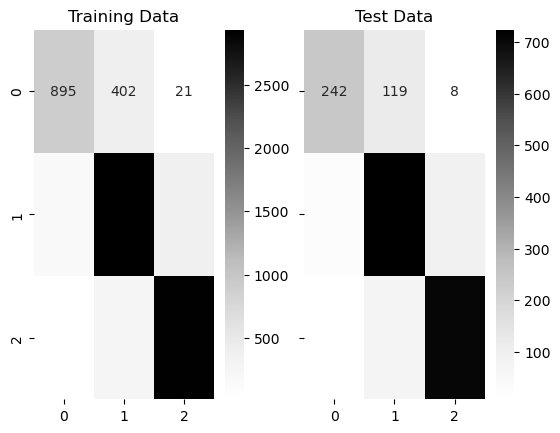

In [32]:
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)

#Plotting confusion matrix for the different models for the Training Data

plot_0 = sns.heatmap((metrics.confusion_matrix(y_train,pred_train)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][0])
a[0][0].set_title('Training Data')

plot_1 = sns.heatmap((metrics.confusion_matrix(y_test,y_pred)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][1])
a[0][1].set_title('Test Data')

print('Classification Report of the training data:\n\n',metrics.classification_report(y_train,pred_train),'\n')
print('Classification Report of the test data:\n\n',metrics.classification_report(y_test,y_pred),'\n')

## Linear discrimination analysis

In [33]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import classification_report, confusion_matrix

# Prepare the features and target variable
X = data.drop('target', axis=1)
y = data['target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and train the LDA model
lda = LinearDiscriminantAnalysis()
lda.fit(X_train_scaled, y_train)

#Accuracy - Training Data
accuracy1=lda.score(X_train_scaled,y_train)
print('Accuracy - Training Data:',accuracy1)

#Accuracy - Test Data
accuracy2=lda.score(X_test_scaled,y_test)
print('Accuracy - Test Data:',accuracy2)

Accuracy - Training Data: 0.541
Accuracy - Test Data: 0.516


In [34]:
# Make predictions
pred_train=lda.predict(X_train_scaled)
y_pred = lda.predict(X_test_scaled)

Classification Report of the training data:

               precision    recall  f1-score   support

           1       0.69      0.29      0.41      1318
           2       0.52      0.56      0.54      3477
           3       0.54      0.63      0.58      3205

    accuracy                           0.54      8000
   macro avg       0.58      0.49      0.51      8000
weighted avg       0.56      0.54      0.53      8000
 

Classification Report of the test data:

               precision    recall  f1-score   support

           1       0.73      0.28      0.40       369
           2       0.49      0.55      0.52       841
           3       0.51      0.59      0.55       790

    accuracy                           0.52      2000
   macro avg       0.58      0.47      0.49      2000
weighted avg       0.54      0.52      0.51      2000
 



Text(0.5, 1.0, 'Test Data')

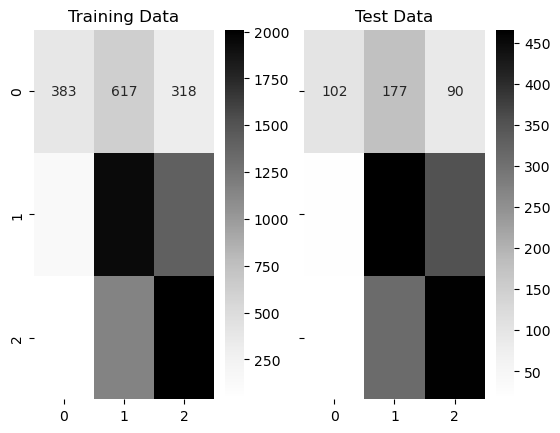

In [35]:
print('Classification Report of the training data:\n\n',metrics.classification_report(y_train,pred_train),'\n')
print('Classification Report of the test data:\n\n',metrics.classification_report(y_test,y_pred),'\n')

f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)

#Plotting confusion matrix for the different models for the Training Data

plot_0 = sns.heatmap((metrics.confusion_matrix(y_train,pred_train)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][0])
a[0][0].set_title('Training Data')

plot_1 = sns.heatmap((metrics.confusion_matrix(y_test,y_pred)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][1])
a[0][1].set_title('Test Data')

## GaussianNB

In [36]:
#split dataset and the training set and test set
X = data.drop('target', axis=1)
y = data['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#nomilization
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#GaussianNB model
gnb = GaussianNB()
gnb.fit(X_train_scaled, y_train)

#prediction
pred_train=gnb.predict(X_train_scaled)
y_pred = gnb.predict(X_test_scaled)
print("Number of mislabeled points out of a total {} points :{}\n".format(X_test_scaled.shape[0], (y_test != y_pred).sum()))

#score and accuracy score
print('score:',gnb.score(X,y),'\n')
print('accuracy score:',accuracy_score(y_test,y_pred),'\n')

#cross validate and mean cross validation
a = cross_val_score(gnb, X, y, cv=5, scoring='accuracy')
print('cross validation score:',a,'\n')
print('mean = ',stat.mean(a))

#draw confusion matrix
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.heatmap((metrics.confusion_matrix(y_train,pred_train)),annot=True,fmt='.5g',cmap='Greys')
plt.title('Training Data')
plt.subplot(1,2,2)
sns.heatmap((metrics.confusion_matrix(y_test,y_pred)),annot=True,fmt='.5g',cmap='Greys')
plt.title('Test Data')

NameError: name 'GaussianNB' is not defined

## MultinomialNB

In [37]:
clf = MultinomialNB()
#prediction
y_predm = clf.fit(X_train, y_train).predict(X_test_scaled)
pred_train=clf.fit(X_train,y_train).predict(X_train_scaled)

#score and accuracy score
print('score:',clf.score(X,y))
print('accuracy score:',accuracy_score(y_test,y_predm))

#cross validation score
a = cross_val_score(clf, X, y, cv=5, scoring='accuracy' )
print('cross validation score:',a)
print('mean = ',stat.mean(a))

#draw confusion matrix
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.heatmap((metrics.confusion_matrix(y_train,pred_train)),annot=True,fmt='.5g',cmap='Greys')
plt.title('Training Data')
plt.subplot(1,2,2)
sns.heatmap((metrics.confusion_matrix(y_test,y_predm)),annot=True,fmt='.5g',cmap='Greys')
plt.title('Test Data')

NameError: name 'MultinomialNB' is not defined

## BernoulliNB

In [38]:
clf2 = BernoulliNB()
y_predb = clf2.fit(X_train_scaled, y_train).predict(X_test_scaled)
pred_train=clf2.fit(X_train_scaled,y_train).predict(X_train_scaled)

print('score:',clf2.score(X,y))
print('accuracy score:',accuracy_score(y_test,y_predb))

a = cross_val_score(clf2, X, y, cv=5, scoring='accuracy' )
print('cross validation score:',a)
print('mean = ',stat.mean(a))

#draw confusion matrix
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.heatmap((metrics.confusion_matrix(y_train,pred_train)),annot=True,fmt='.5g',cmap='Greys')
plt.title('Training Data')
plt.subplot(1,2,2)
sns.heatmap((metrics.confusion_matrix(y_test,y_predb)),annot=True,fmt='.5g',cmap='Greys')
plt.title('Test Data')

NameError: name 'BernoulliNB' is not defined

## SVM

In [39]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   district  10000 non-null  int64  
 1   Price     10000 non-null  float64
 2   size      10000 non-null  float64
 3    sold     10000 non-null  int64  
 4   target    10000 non-null  int64  
dtypes: float64(2), int64(3)
memory usage: 390.8 KB


In [41]:
# Prepare the features and target variable
X = data.drop('target', axis=1)
y = data['target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and train the SVM model
svm_model = SVC(C=100.0)
svm_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = svm_model.predict(X_test_scaled)
pred_train=svm_model.predict(X_train_scaled)

# print the scores on training and test set
print('Training set score: {:.4f}'.format(svm_model.score(X_train_scaled, y_train)))
print('Test set score: {:.4f}'.format(svm_model.score(X_test_scaled, y_test)))

# compute and print accuracy score
print('Model accuracy score with default hyperparameters: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))

#draw confusion matrix
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.heatmap((metrics.confusion_matrix(y_train,pred_train)),annot=True,fmt='.5g',cmap='Greys')
plt.title('Training Data')
plt.subplot(1,2,2)
sns.heatmap((metrics.confusion_matrix(y_test,y_pred)),annot=True,fmt='.5g',cmap='Greys')
plt.title('Test Data')

Training set score: 0.9695
Test set score: 0.9605


NameError: name 'accuracy_score' is not defined

In [ ]:
cm = confusion_matrix(y_test, y_pred)

TP = cm[1,1]
TN = cm[0,0]
FP = cm[0,1]
FN = cm[1,0]

# print classification accuracy
classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)
print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

# print classification error
classification_error = (FP + FN) / float(TP + TN + FP + FN)
print('Classification error : {0:0.4f}'.format(classification_error))

# print true positive rate
true_positive_rate = TP / float(TP + FN)
print('True Positive Rate : {0:0.4f}'.format(true_positive_rate))

#print false positive rate
false_positive_rate = FP / float(FP + TN)
print('False Positive Rate : {0:0.4f}'.format(false_positive_rate))

#print specificity
specificity = TN / (TN + FP)
print('Specificity : {0:0.4f}'.format(specificity))

## Decision tree

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import accuracy_score


# Prepare the features and target variable
X = data.drop('target', axis=1)
y = data['target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the decision tree classifier
dt_classifier = DecisionTreeClassifier(criterion='entropy',max_depth=5,random_state=42)
dt_classifier.fit(X_train, y_train)

In [ ]:
import pydotplus
from IPython.display import Image
from sklearn import tree

dot_data = tree.export_graphviz(dt_classifier, feature_names=X.columns,class_names=['Class 1','Class 2', 'Class 3'],filled=True,  
                                out_file=None) 
graph = pydotplus.graph_from_dot_data(dot_data) 
Image(graph.create_png(),width=800)

In [42]:
# Make predictions
y_pred_train = dt_classifier.predict(X_train)
y_pred_test = dt_classifier.predict(X_test)

# Calculate accuracy
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)
print("Training Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)
print('-----------------------------------------------------------------')

# Confusion matrix and classification report
print("\nClassification Report (Training Data):\n", classification_report(y_train, y_pred_train))
print('-----------------------------------------------------------------')
print("\nClassification Report (Test Data):\n", classification_report(y_test, y_pred_test))
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.heatmap((metrics.confusion_matrix(y_train,y_pred_train)),annot=True,fmt='.5g',cmap='Greys')
plt.title('Training Data')
plt.subplot(1,2,2)
sns.heatmap((metrics.confusion_matrix(y_test,y_pred_test)),annot=True,fmt='.5g',cmap='Greys')
plt.title('Test Data')

NameError: name 'dt_classifier' is not defined

## Look at the model fitting result

In [43]:
#model fitting and evaluation
maxdepths=[1,2,3,4,5,6,7,8,9,10]

trainAcc=np.zeros(len(maxdepths))
testAcc=np.zeros(len(maxdepths))

index=0
for depth in maxdepths:
    dt_classicifier=DecisionTreeClassifier(max_depth=depth)
    dt_classicifier=dt_classicifier.fit(X_train,y_train)
    y_pred_train=dt_classicifier.predict(X_train)
    y_pred_test=dt_classicifier.predict(X_test)
    trainAcc[index]=accuracy_score(y_train,y_pred_train)
    testAcc[index]=accuracy_score(y_test,y_pred_test)
    index+=1

#plot of training and test accuracies
plt.plot(maxdepths,trainAcc,'ro-',maxdepths,testAcc,'bv--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('Max depth')
plt.ylabel('Accuracy')

NameError: name 'DecisionTreeClassifier' is not defined

### My New Way 

In [ ]:
# 